# Your first Python pipeline

<!-- start description -->
Introductory tutorial to learn the basics of Ploomber.
<!-- end description -->

## Installing dependencies
We'll run a few commands to bootstrap the colab instance ~40 seconds

In [1]:
# Basic installs, run this and read the bottom instructions
!echo Installing Ploomber
!pip -q install ploomber black
!echo Installing pygraphviz
!sudo apt-get -q update -y
!sudo apt-get -q install -y graphviz graphviz-dev
!pip -q install graphviz 'pygraphviz<1.8'

Installing Ploomber
     |████████████████████████████████| 294 kB 14.4 MB/s 
     |████████████████████████████████| 1.4 MB 67.7 MB/s 
     |████████████████████████████████| 40 kB 9.7 kB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 69 kB 5.5 MB/s 
     |████████████████████████████████| 10.9 MB 55.5 MB/s 
     |████████████████████████████████| 297 kB 56.3 MB/s 
     |████████████████████████████████| 843 kB 59.5 MB/s 
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 42 kB 486 kB/s 
     |████████████████████████████████| 793 kB 39.7 MB/s 
     |████████████████████████████████| 792 kB 58.5 MB/s 
     |████████████████████████████████| 792 kB 63.9 MB/s 
     |████████████████████████████████| 791 kB 63.9 MB/s 
     |████████████████████████████████| 790 kB 67.7 MB/s 
     |████████████████████████████████| 788 kB 73.0 MB/s 
     |████████████████████████████████| 787 kB 57.7 MB/s 
   

In [3]:
!ploomber examples -n guides/first-pipeline -o first-pipeline
%cd first-pipeline

# You should see all of the pipeline content
!ls -l

Local copy does not exist...
Cloning into '/root/.ploomber/projects'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 418 (delta 65), reused 287 (delta 35), pack-reused 0
Receiving objects: 100% (418/418), 1.35 MiB | 2.42 MiB/s, done.
Resolving deltas: 100% (65/65), done.
=========== Copying example guides/first-pipeline to first-pipeline/ ===========
Next steps:

$ cd first-pipeline/
$ ploomber install

Open first-pipeline/README.md for details.
/content/first-pipeline
total 152
-rw-r--r-- 1 root root    338 Mar  6 20:06 1-get.py
-rw-r--r-- 1 root root    384 Mar  6 20:06 2-profile-raw.py
-rw-r--r-- 1 root root    401 Mar  6 20:06 3-clean.py
-rw-r--r-- 1 root root    394 Mar  6 20:06 4-profile-clean.py
-rw-r--r-- 1 root root    335 Mar  6 20:06 5-plot.py
-rw-r--r-- 1 root root    141 Mar  6 20:06 environment.yml
-rw-r--r-- 1 root root    616 Mar  6 20:06 pipeline.yaml
-rw-r--r-- 

## Introduction

Ploomber helps you build modular pipelines. A pipeline (or **DAG**) is a group of tasks with a particular execution order, where subsequent (or **downstream** tasks) use previous (or **upstream**) tasks as inputs.

## Pipeline declaration

This example pipeline contains five tasks, `1-get.py`, `2-profile-raw.py`, 
`3-clean.py`, `4-profile-clean.py` and `5-plot.py`; we declare them in a `pipeline.yaml` file:

```yaml
# Content of pipeline.yaml
tasks:
   # source is the code you want to execute (.ipynb also supported)
  - source: 1-get.py
    # products are task's outputs
    product:
      # scripts generate executed notebooks as outputs
      nb: output/1-get.ipynb
      # you can define as many outputs as you want
      data: output/raw_data.csv

  - source: 2-profile-raw.py
    product: output/2-profile-raw.ipynb

  - source: 3-clean.py
    product:
      nb: output/3-clean.ipynb
      data: output/clean_data.parquet

  - source: 4-profile-clean.py
    product: output/4-profile-clean.ipynb

  - source: 5-plot.py
    product: output/5-plot.ipynb

```

**Note:** YAML is a human-readable text format similar to JSON.

**Note:** Ploomber supports Python scripts, Python functions, Jupyter notebooks, R scripts, and SQL scripts.

## Opening `.py` files as notebooks

Ploomber integrates with Jupyter. Among other things, it **allows you to open `.py` files as notebooks** (via `jupytext`).

![lab-open-with-nb](https://ploomber.io/images/doc/lab-open-with-notebook.png)

### What sets the execution order?

Ploomber infers the pipeline structure from your code. For example, to
clean the data, we must get it first; hence, we declare the following in `3-clean.py`:

~~~python
# 3-clean.py

# this tells Ploomber to execute the '1-get' task before '3-clean'
upstream = ['1-get']
~~~

## Plotting the pipeline

In [4]:
%%bash
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 5/5 [00:00<00:00, 14453.15it/s]


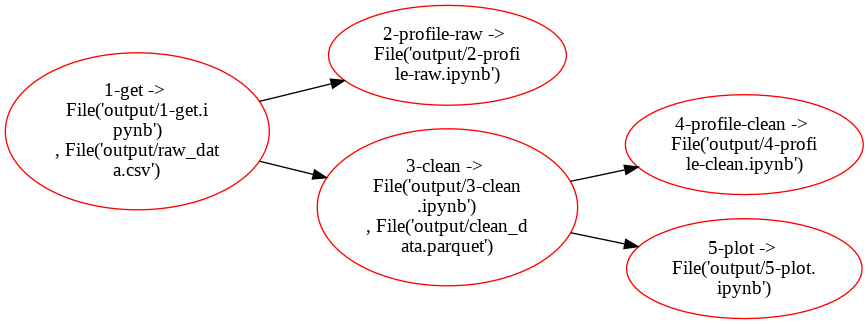

In [5]:
from IPython.display import Image
Image(filename='pipeline.png')

You can see that our pipeline has a defined execution order.

**Note:** This is a sample predifined five-task pipeline, Ploomber can manage arbitrarily complex pipelines and dependencies among tasks.

## Running the pipeline

In [6]:
%%bash
# takes a few seconds to finish
ploomber build

name             Ran?      Elapsed (s)    Percentage
---------------  ------  -------------  ------------
1-get            True          2.41966       15.0223
2-profile-raw    True          3.43702       21.3385
3-clean          True          1.954         12.1313
4-profile-clean  True          2.93714       18.2351
5-plot           True          5.3593        33.2728


Building task '5-plot': 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


This pipeline saves all the output in the `output/` directory; we have the output notebooks and data files:

In [7]:
%%bash
ls output

1-get.ipynb
2-profile-raw.ipynb
3-clean.ipynb
4-profile-clean.ipynb
5-plot.ipynb
clean_data.parquet
raw_data.csv


## Updating the pipeline

Ploomber automatically caches your pipeline’s previous results and only runs tasks that changed since your last execution.

Execute the following to modify the `3-clean.py` script

In [8]:
from pathlib import Path

path = Path('3-clean.py')
clean = path.read_text()

# add a print statement at the end of 3-clean.py
path.write_text(clean + """
print("hello")
""")

417

Execute the pipeline again:

In [9]:
%%bash
# takes a few seconds to finish
ploomber build

name             Ran?      Elapsed (s)    Percentage
---------------  ------  -------------  ------------
3-clean          True          2.04615       19.5922
4-profile-clean  True          2.8772        27.5496
5-plot           True          5.52036       52.8583
1-get            False         0              0
2-profile-raw    False         0              0


Building task '5-plot': 100%|██████████| 3/3 [00:10<00:00,  3.48s/it]


In [10]:
# restore contents
path.write_text(clean)

401

You'll see that `1-get.py` & `2-profile-raw.py` didn't run because it was not affected by the change!

## Where to go from here

**Bring your own code!** Check out the tutorial to [migrate your code to Ploomber](https://docs.ploomber.io/en/latest/user-guide/refactoring.html).

Have questions? [Ask us anything on Slack](https://ploomber.io/community/).

Want to dig deeper into Ploomber's core concepts? Check out [the basic concepts tutorial](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

Want to start a new project quickly? Check out [how to get examples](https://docs.ploomber.io/en/latest/user-guide/templates.html).

